In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing Data**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/UpdatedResumeDataSet.csv')

In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [6]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

# **Visualizing Data**

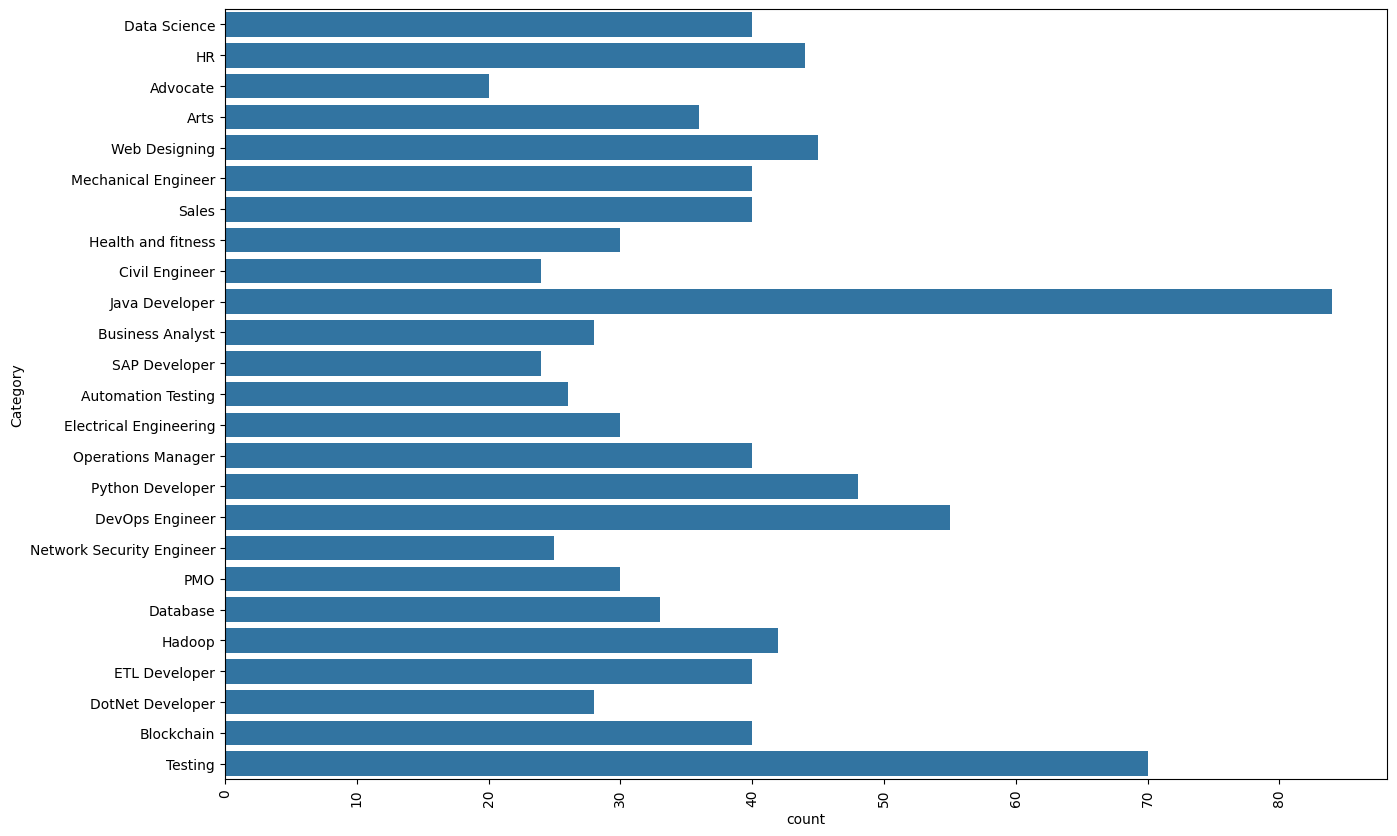

In [7]:
plt.figure(figsize=(15,10))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [8]:
count = df['Category'].value_counts()
labels = df['Category'].unique()

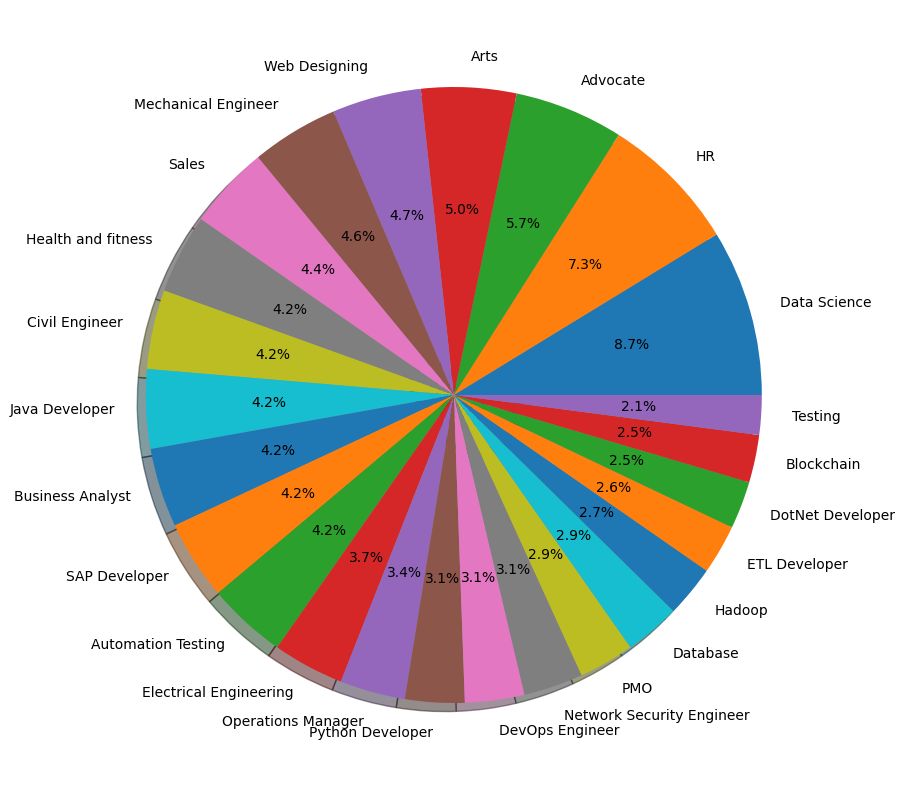

In [9]:
plt.figure(figsize=(10,10))
plt.pie(count, labels=labels, autopct='%1.1f%%', shadow = True)
plt.show()

# **Tokenization**

In [10]:
import spacy
import re

nlp = spacy.load('en_core_web_sm')

In [11]:
def preprocess_tokenize(text):
    doc = nlp(text)

    # Remove stop words, punctuation, URLs, email addresses, and extra spaces
    cleaned_tokens = [
        token.text for token in doc
        if not token.is_stop            # Remove stop words
        and not token.is_punct          # Remove punctuation
        and not token.like_url          # Remove URLs
        and not token.like_email        # Remove email addresses
        and not token.is_space          # Remove newlines and extra spaces
    ]
    cleaned_text = ' '.join(cleaned_tokens)
    cleaned_text = re.sub('#[\w-]+', '', cleaned_text) #Remove # words
    cleaned_text = re.sub('@\w+', '', cleaned_text) #Remove @ words
    cleaned_text = re.sub(r'[^\x00-\x7f]', '', cleaned_text) #Remove non-ascii


    return cleaned_text.strip()

In [12]:
text_with_links = """
Check out this website: https://example.com and this one too: http://another-example.com #awesome #123.
Contact us at email@example.com. Follow us @example and @another_user!
Special characters: %$#@!&*(). This is a sample text with some stop words.
"""

In [13]:
preprocess_tokenize(text_with_links)

'Check website awesome 123 Contact Follow   Special characters $ sample text stop words'

In [14]:
df['Resume'][38]

'Personal Skills â\x9e¢ Ability to quickly grasp technical aspects and willingness to learn â\x9e¢ High energy levels & Result oriented. Education Details \r\nJanuary 2018 Master of Engineering Computer Technology & Application Bhopal, Madhya Pradesh Truba Institute of Engineering & Information Technology\r\nJanuary 2010 B.E. computer science Bhopal, Madhya Pradesh RKDF Institute of Science and Technology College of Engineering\r\nJanuary 2006 Polytechnic Information Technology Vidisha, Madhya Pradesh SATI Engineering College in Vidisha\r\nJanuary 2003 M.tech Thesis Detail  BMCH School in Ganj basoda\r\nData science \r\n\r\nI have six month experience in Data Science. Key Skills: - Experience in Machine Learning, Deep Leaning, NLP, Python, SQL, Web Scraping Good knowledge in computer subjects and ability to update\r\nSkill Details \r\nExperience in Machine Learning, Deep Learning, NLP, Python, SQL, Web Crawling, HTML,CSS.- Exprience - Less than 1 year monthsCompany Details \r\ncompany 

In [15]:
preprocess_tokenize(df['Resume'][38])

'Personal Skills  Ability quickly grasp technical aspects willingness learn  High energy levels Result oriented Education Details January 2018 Master Engineering Computer Technology Application Bhopal Madhya Pradesh Truba Institute Engineering Information Technology January 2010 B.E. computer science Bhopal Madhya Pradesh RKDF Institute Science Technology College Engineering January 2006 Polytechnic Information Technology Vidisha Madhya Pradesh SATI Engineering College Vidisha January 2003 Thesis Detail BMCH School Ganj basoda Data science month experience Data Science Key Skills Experience Machine Learning Deep Leaning NLP Python SQL Web Scraping Good knowledge computer subjects ability update Skill Details Experience Machine Learning Deep Learning NLP Python SQL Web Crawling HTML CSS.- Exprience 1 year monthsCompany Details company RNT.AI Technology Solution description Text classification Machine learning Algorithms python Practical knowledge Deep learning algorithms  Recurrent Neur

In [16]:
df['tokenized_resume'] = df['Resume'].apply(preprocess_tokenize)

In [17]:
df.head()

,Category,Resume,tokenized_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details 2013 2017 B.E UIT RGPV Data ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas Interest Deep Learning Control System De...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


# **Vectorization**

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [19]:
df.head()

,Category,Resume,tokenized_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details 2013 2017 B.E UIT RGPV Data ...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas Interest Deep Learning Control System De...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [20]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [21]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [23]:
required_text = tfidf.fit_transform(df['tokenized_resume'])

In [24]:
required_text

<962x7311 sparse matrix of type '<class 'numpy.float64'>'
	with 162684 stored elements in Compressed Sparse Row format>

# **Training a model**

In [25]:
from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(required_text, df['Category'], test_size=0.2, random_state=38)

In [26]:
X_train.shape

(769, 7311)

In [27]:
X_test.shape

(193, 7311)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [29]:
y_pred = clf.predict(X_test)

# **Evaluation**

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('The Accuracy of the model is:',accuracy_score(y_test, y_pred))

The Accuracy of the model is: 0.9792746113989638


In [31]:
print('The classification report:\n', classification_report(y_test, y_pred))

The classification report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         2
           6       1.00      0.80      0.89        10
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.97        15
           9       0.88      1.00      0.93         7
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         4
          12       0.92      1.00      0.96        11
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        13

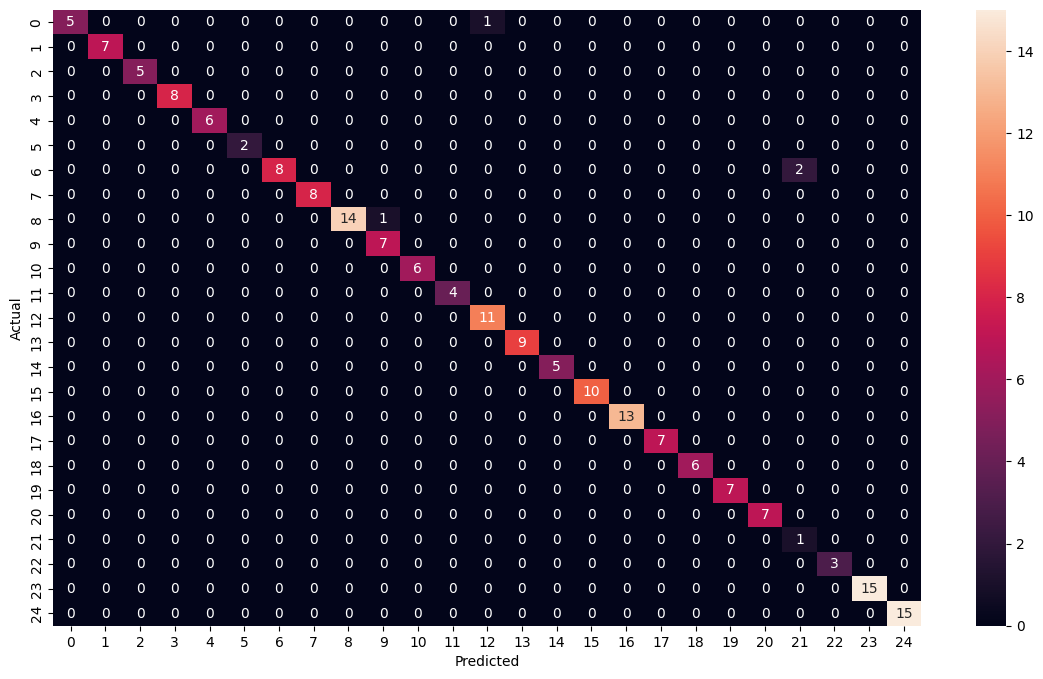

In [32]:
plt.figure(figsize=(14,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Saving a model**

In [33]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(clf, open('model.pkl', 'wb'))

In [34]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [37]:
clf = pickle.load(open('/content/model.pkl', 'rb'))
tfidfd = pickle.load(open('/content/tfidf.pkl', 'rb'))
# Clean the input resume
cleaned_resume = preprocess_tokenize(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidfd.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6
